# Model Analysis

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [14]:
with open("../data/weights.json") as f:
    role_weights =  json.load(f)

https://fm-arena.com/thread/2182-important-attributes-for-blue-dm/

In [15]:
df = pd.read_csv('../data/processed/players_2024_clean.csv')

In [16]:
df.head(5)

,name,position,best_pos,age,nation,height,weight,club,transfer_value,min_value,...,hdrs_l/90,k_tck/90,op-cr_%,op-crs_a/90,op-crs_c/90,ps_a/90,shts_blckd/90,shots_outside_box/90,xg/90,saves/90
0,Loïs Openda,ST (C),ST (C),24.0,BEL,177,75,RB Leipzig,£73M - £88M,73000000.0,...,3.95,0.00,0.18,1.92,0.34,21.29,0.03,0.96,0.59,0
1,Benjamin Šeško,ST (C),ST (C),21.0,SVN,194,85,RB Leipzig,£62M - £95M,62000000.0,...,3.02,0.00,0.14,1.32,0.19,22.97,0.00,0.85,0.74,0
2,Victor Boniface,ST (C),ST (C),23.0,NGA,190,91,Bayer Leverkusen,£31M - £39M,31000000.0,...,3.25,0.00,0.00,0.09,0.00,19.92,0.12,0.46,0.48,0
3,Serhou Guirassy,ST (C),ST (C),28.0,GUI,187,82,Borussia Dortmund,£54M - £70M,54000000.0,...,5.00,0.00,0.00,0.21,0.00,14.68,0.03,0.45,0.45,0
4,Jonas Wind,"AM (LC), ST (C)",ST (C),25.0,DEN,190,82,VfL Wolfsburg,£64M - £77M,64000000.0,...,2.46,0.06,0.00,0.20,0.00,30.17,0.03,0.28,0.51,0


In [17]:
attributes = [
    "acc", "aer", "agg", "agi", "ant", "bal", "bra", "cmd", "com", "cmp", "cnt", "cor", "cro",
    "dec", "det", "dri", "ecc", "feet", "fin", "fir", "fla", "fre", "han", "hea", "jum", "kic", "ldr",
    "lon", "l_th", "mar", "nat", "otb", "1v1", "pac", "pas", "pen", "pos", "pun", "ref", "tro",
    "sta", "str", "tck", "tea", "tec", "thr", "vis", "wor"
]

In [18]:
for col in attributes:
    df[col] = df[col] / 20

In [19]:
def compute_role_score(row, weights):
    score = 0
    for att, w in weights.items():
        score += row[att] * w
    return score / sum(weights.values())  # weighted average


In [20]:
# compute all the scores
for role, weights in role_weights.items():
    df.loc[:,f'{role.lower()}_score'] = df.apply(lambda x: compute_role_score(x, weights['Default']), axis=1)

In [21]:
score_cols = [col for col in df.columns if col.endswith('_score')]

df[['name','position','best_pos'] + score_cols].sample(10)

,name,position,best_pos,st_score,amrl_score,amc_score,mc_score,mrl_score,dm_score,wbrl_score,drl_score,dc_score,gk_score
678,Oliver Skipp,"DM, M (C)",DM,0.648966,0.641702,0.659992,0.663576,0.648496,0.662715,0.659966,0.664134,0.695435,0.494340
92,Aleix García,"DM, M (C)",M (C),0.655688,0.659072,0.665008,0.676490,0.660150,0.671993,0.656926,0.656184,0.643261,0.497642
138,Tjark Ernst,GK,GK,0.482478,0.474490,0.496866,0.518957,0.466165,0.512457,0.481250,0.478975,0.543478,0.615660
115,Josha Vagnoman,D/WB (RL),WB (R),0.644093,0.626582,0.639343,0.622517,0.631579,0.626804,0.636318,0.633392,0.640652,0.481132
280,Pathé Ciss,"DM, M (C)",DM,0.616547,0.615682,0.628116,0.637748,0.622932,0.636942,0.628716,0.631449,0.676957,0.491321
179,Raúl García,"M/AM (C), ST (C)",ST (C),0.595068,0.572169,0.584973,0.602152,0.568985,0.600773,0.571453,0.571113,0.593261,0.455094
403,Matteo Politano,"M (R), AM (RLC)",AM (R),0.664141,0.661621,0.661721,0.643626,0.649436,0.643213,0.636993,0.632686,0.588043,0.461226
584,Maduka Okoye,GK,GK,0.425835,0.410443,0.428419,0.440480,0.408553,0.439691,0.421791,0.421820,0.510761,0.611604
32,João Palhinha,"DM, M (C)",DM,0.669551,0.658755,0.671201,0.691474,0.667105,0.684021,0.677703,0.677739,0.714565,0.512736
751,Archie Gray,"DM, M (C)",M (C),0.640851,0.629430,0.644187,0.645530,0.622556,0.645189,0.625338,0.624382,0.633261,0.481509


In [22]:
corrs = df[score_cols + ['av_rat']].corr()['av_rat'].loc[score_cols]
corrs

st_score      0.361589
amrl_score    0.327849
amc_score     0.361483
mc_score      0.320044
mrl_score     0.290347
dm_score      0.328423
wbrl_score    0.298256
drl_score     0.294299
dc_score      0.283054
gk_score      0.194821
Name: av_rat, dtype: float64

## Strikers

In [24]:
df_st = df[df['best_pos'] == 'ST (C)'].copy()

In [25]:
df_st.describe()

,age,height,weight,min_value,max_value,wages,lf_val,rf_val,acc,aer,...,st_score,amrl_score,amc_score,mc_score,mrl_score,dm_score,wbrl_score,drl_score,dc_score,gk_score
count,92.000000,92.000000,92.000000,9.200000e+01,9.200000e+01,92.000000,92.000000,92.000000,92.000000,92.000000,...,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,26.510870,184.206522,78.413043,5.528042e+07,6.468584e+07,64809.239130,6.673913,8.978261,0.676630,0.119565,...,0.672525,0.640923,0.661725,0.630162,0.617960,0.632034,0.622224,0.620605,0.621069,0.480778
std,4.632647,6.439128,6.611931,1.127832e+08,1.142659e+08,85015.988131,2.606453,2.343934,0.095129,0.046413,...,0.036534,0.034568,0.036622,0.033905,0.032451,0.033938,0.032668,0.033038,0.033830,0.022327
min,17.000000,169.000000,65.000000,0.000000e+00,2.200000e+04,600.000000,2.000000,2.000000,0.400000,0.050000,...,0.595068,0.572169,0.584973,0.570695,0.553759,0.574914,0.562162,0.561042,0.556630,0.432075
25%,23.000000,180.000000,73.750000,5.900000e+06,9.700000e+06,21000.000000,4.000000,10.000000,0.600000,0.075000,...,0.646534,0.616025,0.636887,0.605960,0.594901,0.607668,0.597931,0.595031,0.593967,0.464009
50%,26.000000,185.000000,77.000000,2.100000e+07,2.850000e+07,39000.000000,8.000000,10.000000,0.650000,0.100000,...,0.669918,0.636770,0.658321,0.625621,0.614897,0.627749,0.617525,0.617800,0.621304,0.481179
75%,30.000000,189.000000,84.000000,5.025000e+07,7.025000e+07,67000.000000,8.000000,10.000000,0.750000,0.150000,...,0.689966,0.657793,0.680466,0.653104,0.636325,0.655241,0.643433,0.642094,0.643342,0.494575
max,37.000000,201.000000,93.000000,5.000000e+08,5.000000e+08,500000.000000,10.000000,10.000000,1.000000,0.250000,...,0.788544,0.757700,0.771619,0.747517,0.726880,0.737113,0.719595,0.716431,0.719783,0.535283


In [26]:
metrics = ['gls', 'xg', 'av_rat']

score_cols = [col for col in df_st.columns if col.endswith('_score')]

corrs = df_st[score_cols + metrics].corr()[metrics].loc[score_cols]
corrs

,gls,xg,av_rat
st_score,0.597541,0.579736,0.604251
amrl_score,0.572793,0.562643,0.558335
amc_score,0.591368,0.571766,0.590448
mc_score,0.568436,0.554421,0.537612
mrl_score,0.568517,0.567850,0.552156
dm_score,0.561110,0.545943,0.544326
wbrl_score,0.573862,0.565656,0.569822
drl_score,0.580422,0.569230,0.577174
dc_score,0.587739,0.564391,0.545321
gk_score,0.594216,0.576684,0.552062


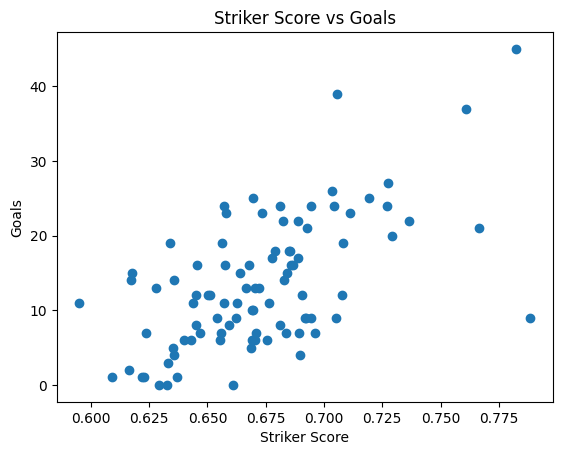

In [29]:
plt.scatter(df_st['st_score'], df_st['gls'])
plt.xlabel("Striker Score")
plt.ylabel("Goals")
plt.title("Striker Score vs Goals")
plt.show()


In [31]:
df_st[['name', 'gls']].sort_values('gls', ascending=False)

,name,gls
145,Kylian Mbappé,45
752,Randal Kolo Muani,39
146,Robert Lewandowski,37
0,Loïs Openda,27
753,Elye Wahi,26
...,...,...
561,Matija Popović,1
860,Mohamed-Ali Cho,1
117,Eric Maxim Choupo-Moting,0
697,Cameron Archer,0


In [36]:
df[df['club']=='Chelsea']

,name,position,best_pos,age,nation,height,weight,club,transfer_value,min_value,...,st_score,amrl_score,amc_score,mc_score,mrl_score,dm_score,wbrl_score,drl_score,dc_score,gk_score
691,Robert Sánchez,GK,GK,26.0,ESP,197,91,Chelsea,£32M - £38M,32000000.0,...,0.482538,0.465577,0.492135,0.498675,0.462594,0.494674,0.471791,0.468551,0.535652,0.654151
